In [2]:
import pandas as pd
data  = pd.read_excel('2017捷運人流_日期時間合併.xlsx')
data.head()

,Date,時段,Station,出站,CrowdFlow
0,2017-01-01 0:00:00,0,BL板橋,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,361
1,2017-01-01 0:00:00,0,七張,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,56
2,2017-01-01 0:00:00,0,三和國中,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,52
3,2017-01-01 0:00:00,0,三民高中,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,38
4,2017-01-01 0:00:00,0,三重,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,35


In [3]:
data['Date'] = pd.to_datetime(data['Date']).dt.date
data

,Date,時段,Station,出站,CrowdFlow
0,2017-01-01,0,BL板橋,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,361
1,2017-01-01,0,七張,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,56
2,2017-01-01,0,三和國中,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,52
3,2017-01-01,0,三民高中,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,38
4,2017-01-01,0,三重,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,35
...,...,...,...,...,...
828139,2018-01-01,5,頂埔,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,56
828140,2018-01-01,5,頂溪,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,200
828141,2018-01-01,5,頭前庄,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,17
828142,2018-01-01,5,麟光,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,45


In [4]:
data_station = data.groupby('Station').sum('CrowFlow')
data_station = data_station.drop('時段',axis=1)
data_station

,CrowdFlow
Station,
BL板橋,14468166
七張,5792604
三和國中,4267114
三民高中,4308973
三重,2074114
...,...
頂埔,2747269
頂溪,12601619
頭前庄,1731437


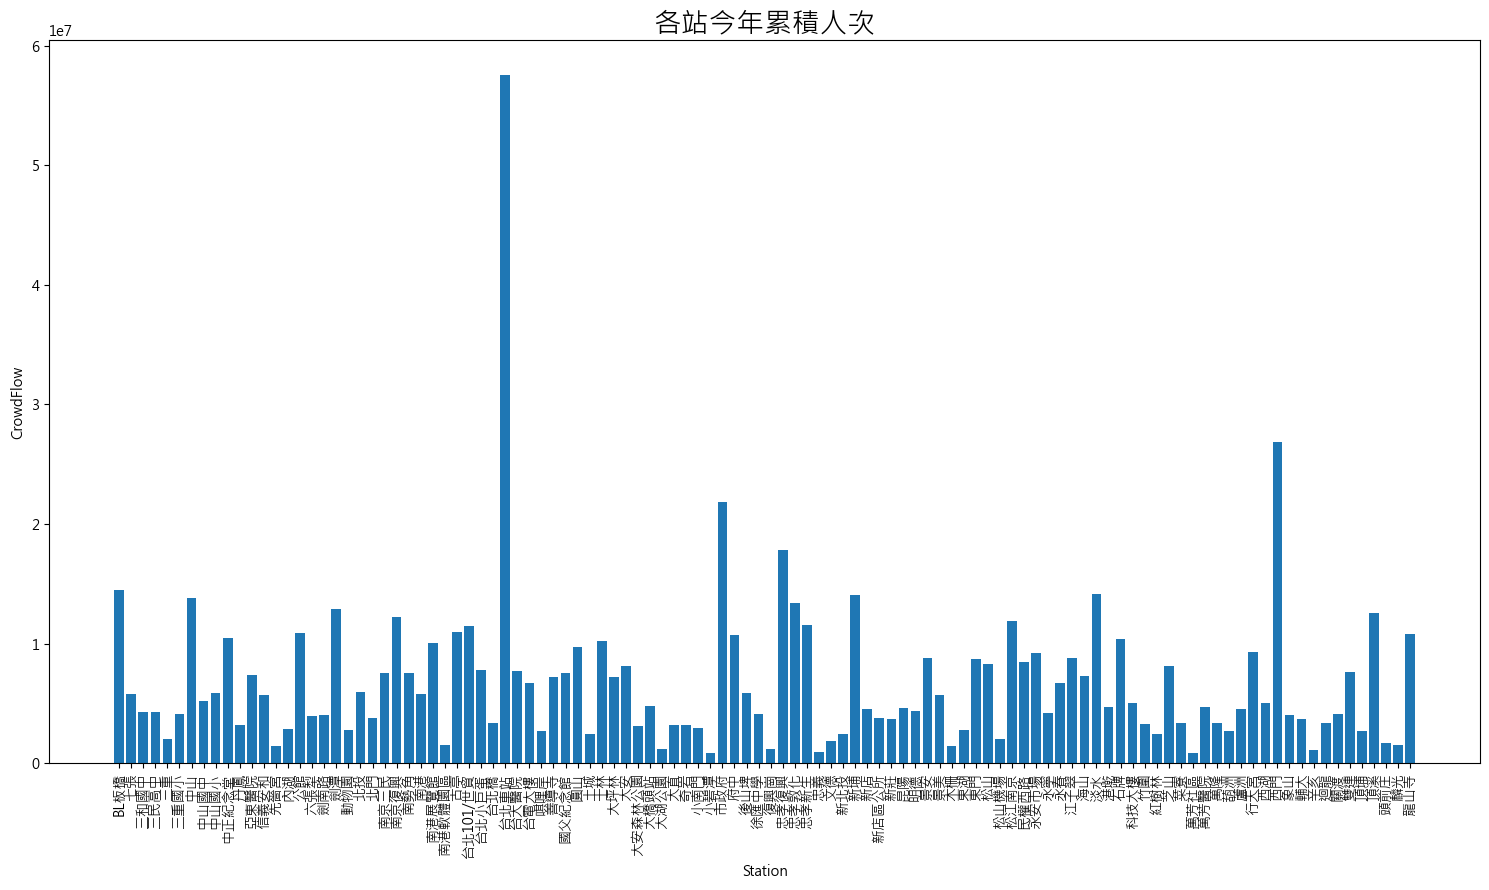

In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

x = data_station['CrowdFlow'].values
stations = data_station.index

plt.figure(figsize=(15, 9))

plt.title('各站今年累積人次', fontsize=20)
plt.bar(stations, x)
plt.xlabel('Station')
plt.ylabel('CrowdFlow')
plt.xticks(range(len(stations)), stations, rotation=90)
plt.subplots_adjust(bottom=0.3)

plt.tight_layout()
plt.show()

### 可以發現台北車站的人數遠超其他站點，其原因我想肯定與該站還有台鐵高鐵及轉運站有一定關係

In [6]:
data_station['CrowdFlow'].describe().astype(int)

count         108
mean      6900915
std       6663938
min        838170
25%       3247069
50%       5067220
75%       8788843
max      57556257
Name: CrowdFlow, dtype: int32

In [7]:
data_time = data.groupby('時段').sum('CrowdFlow')
data_time = data_time.drop([1, 2, 3, 4, 5])
data_time

# 凌晨時段有人是因為當天為跨年
# 根據台北捷運官方網站，正常來說首班車發車為早上六點，末班車為晚上十二點發車，所以我們的分析的部分只抓[0,6~23]這個時段的人流

,CrowdFlow
時段,
0,5180548
6,9707684
7,37121889
8,68069586
9,43003092
10,32300468
11,32790576
12,35763011
13,38195110


In [8]:
data_time['CrowdFlow'].describe().astype(int)

count          19
mean     39204109
std      18324496
min       5180548
25%      34165802
50%      37121889
75%      42705124
max      79498801
Name: CrowdFlow, dtype: int32

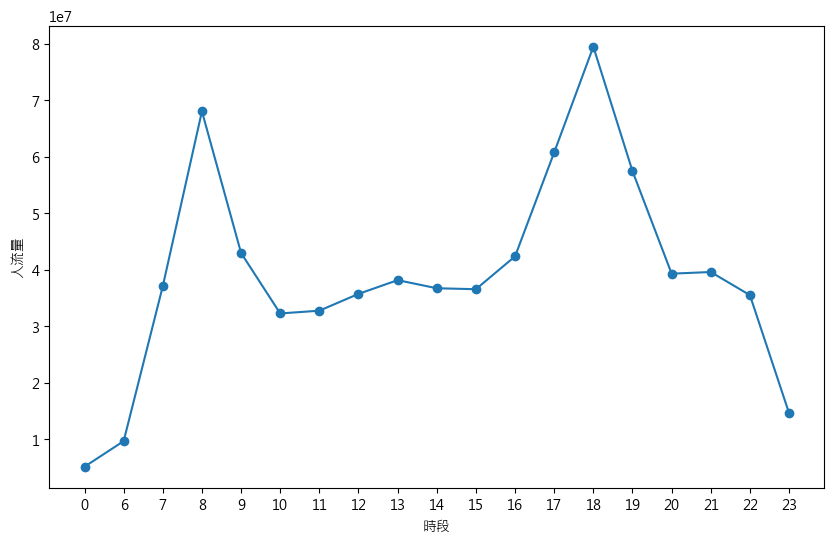

'\n還未區分假日平日的狀況下，可發先時段早上為8點至9點，晚上的4點一路到9點的累積人流都高於平均數\n傍晚時段比早上時段明顯還要多人，可約略猜測不論早上幾點出門，回去的時間其實整個大台北地區還是相當集中的\n'

In [9]:
x = data_time.index.astype(str)  
y = data_time['CrowdFlow']  

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.xlabel('時段')
plt.ylabel('人流量')
plt.xticks(x)


plt.show()

'''
還未區分假日平日的狀況下，可發先時段早上為8點至9點，晚上的4點一路到9點的累積人流都高於平均數
傍晚時段比早上時段明顯還要多人，可約略猜測不論早上幾點出門，回去的時間其實整個大台北地區還是相當集中的
'''


In [10]:
data_date = data.groupby('Date').sum('CrowFlow')
data_date = data_date.drop(data_date.index[-1]).drop('時段',axis=1)
data_date.describe().astype(int)

,CrowdFlow
count,365
mean,2041432
std,237668
min,790631
25%,1974435
50%,2095009
75%,2166513
max,2504886


In [11]:
data_date

,CrowdFlow
Date,
2017-01-01,1881644
2017-01-02,1611187
2017-01-03,2085175
2017-01-04,2101443
2017-01-05,2120337
...,...
2017-12-27,2269483
2017-12-28,2290867
2017-12-29,2495729


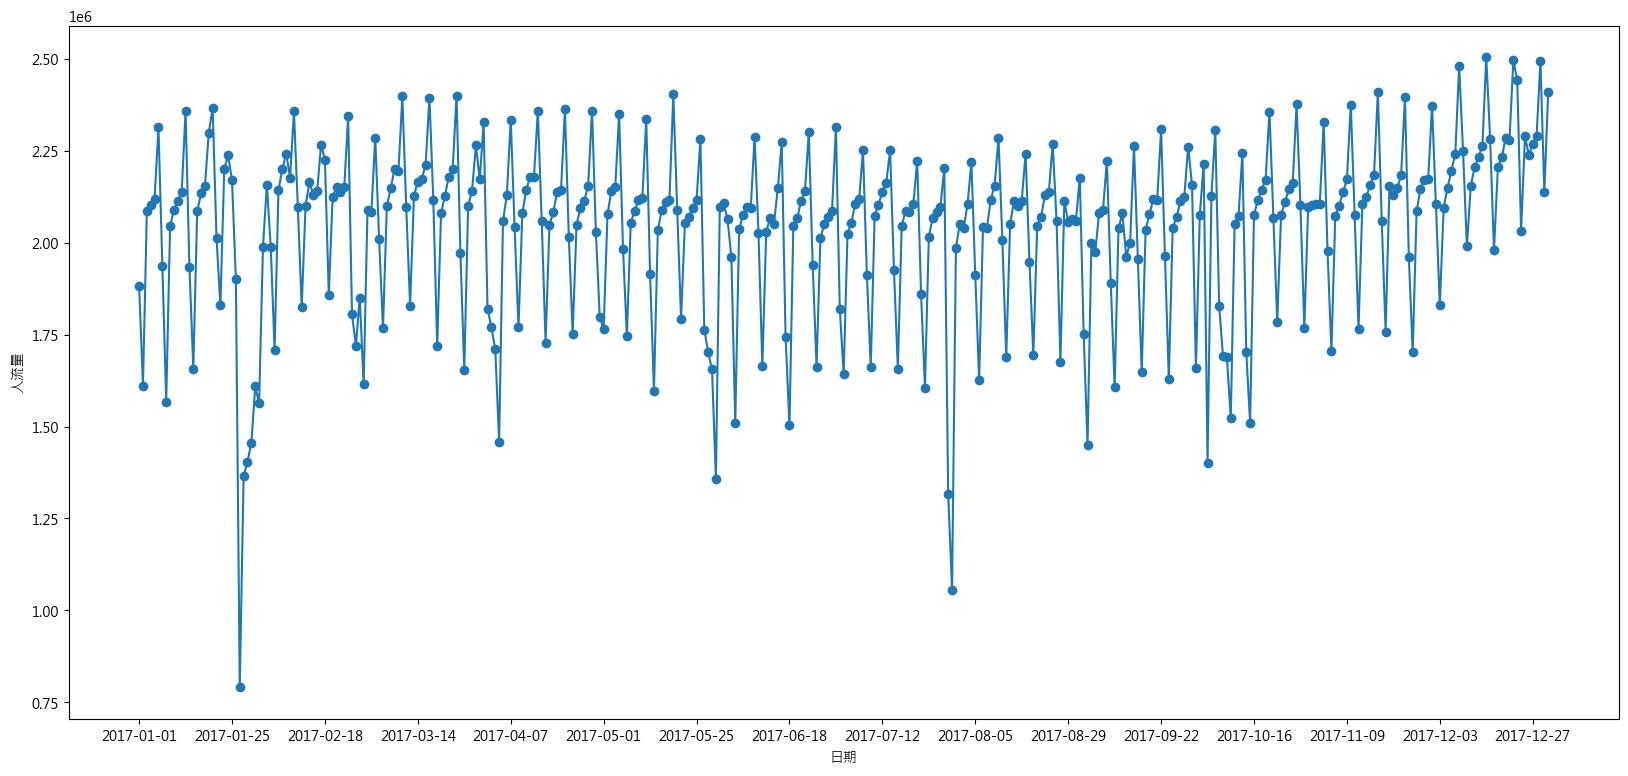

In [12]:
x = data_date.index.astype(str)  
y = data_date['CrowdFlow']
plt.figure(figsize=(20, 9))
plt.plot(x, y, marker='o')
plt.ylabel('人流量')
plt.xlabel('日期')

num_ticks = 15
step = len(x) // num_ticks
plt.xticks(x[::step])

plt.show() 

In [44]:
data['Date'] = pd.to_datetime(data['Date'])
data['Weekday'] = data['Date'].dt.weekday
weekday = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
data['Weekday'] = data['Weekday'].map(lambda x: weekday[x])
data_weekday = data.groupby('Weekday').sum('CrowdFlow').drop('時段',axis=1)
data_weekday.describe().astype(int)


,CrowdFlow
count,7
mean,106471273
std,8759254
min,90648865
25%,103948133
50%,106840115
75%,110395064
max,119123539


In [45]:
data_weekday

,CrowdFlow
Weekday,
Fri,119123539
Mon,105470343
Sat,102425923
Sun,90648865
Thr,111296115
Tue,106840115
Wed,109494014


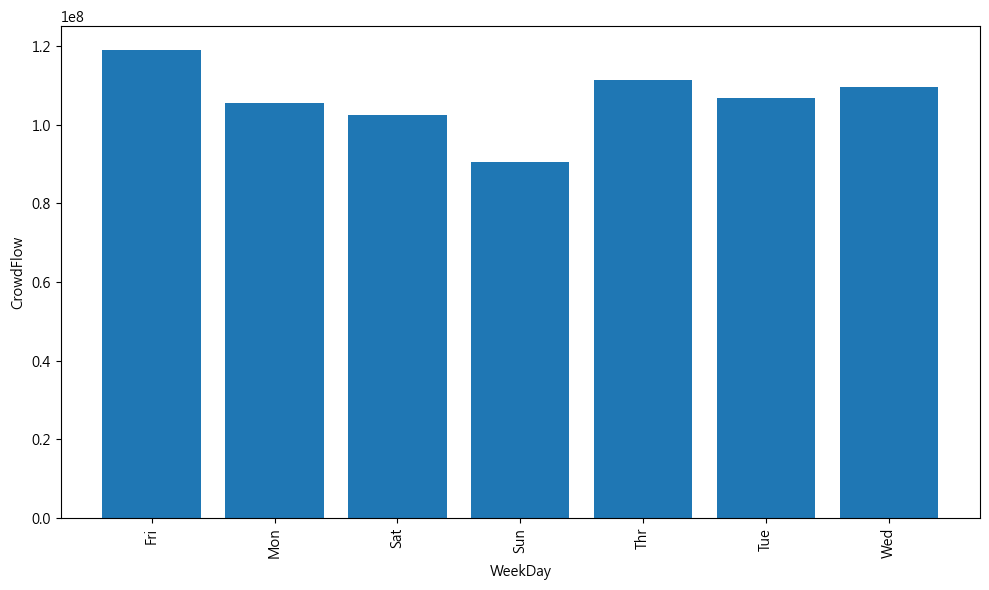

In [46]:
x = data_weekday['CrowdFlow'].values
weekday = data_weekday.index

plt.figure(figsize=(10, 6))

plt.bar(weekday, x)
plt.xlabel('WeekDay')
plt.ylabel('CrowdFlow')
plt.xticks(range(len(weekday)), weekday, rotation=90)
plt.subplots_adjust(bottom=0.3)

plt.tight_layout()
plt.show()

In [52]:
data['CrowdFlow'].describe().astype(int)

count    828144
mean        899
std        1270
min           0
25%         184
50%         528
75%        1135
max       20949
Name: CrowdFlow, dtype: int32

In [62]:
data['crowd'] = data['CrowdFlow'].map(lambda x: '低度擁擠' if x < 184 else ('中度擁擠' if 184 <= x <= 1135 else '高度擁擠'))
data['peak'] = data['時段'].map(lambda x:True if x in (7,8,17,18,19) else False)
# 尖峰時段班次較多
data

,Date,時段,Station,CrowdFlow,Weekday,crowd,peak
0,2017-01-01,0,BL板橋,361,Sun,中度擁擠,False
1,2017-01-01,0,七張,56,Sun,低度擁擠,False
2,2017-01-01,0,三和國中,52,Sun,低度擁擠,False
3,2017-01-01,0,三民高中,38,Sun,低度擁擠,False
4,2017-01-01,0,三重,35,Sun,低度擁擠,False
...,...,...,...,...,...,...,...
828139,2018-01-01,5,頂埔,56,Mon,低度擁擠,False
828140,2018-01-01,5,頂溪,200,Mon,中度擁擠,False
828141,2018-01-01,5,頭前庄,17,Mon,低度擁擠,False
828142,2018-01-01,5,麟光,45,Mon,低度擁擠,False


In [66]:
peek_sample = data[(data['peak']== True) & (data['crowd'] == '低度擁擠')]
peek_sample

,Date,時段,Station,CrowdFlow,Weekday,crowd,peak
328,2017-01-01,7,三重,105,Sun,低度擁擠,True
337,2017-01-01,7,先嗇宮,75,Sun,低度擁擠,True
338,2017-01-01,7,內湖,123,Sun,低度擁擠,True
341,2017-01-01,7,劍南路,130,Sun,低度擁擠,True
343,2017-01-01,7,動物園,65,Sun,低度擁擠,True
...,...,...,...,...,...,...,...
827221,2017-12-31,19,小碧潭,109,Sun,低度擁擠,True
827226,2017-12-31,19,復興崗,171,Sun,低度擁擠,True
827230,2017-12-31,19,忠義,89,Sun,低度擁擠,True
827261,2017-12-31,19,萬芳社區,123,Sun,低度擁擠,True
